In [5]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
from scipy.optimize import curve_fit
from scipy.optimize import minimize
from scipy.signal import find_peaks
from scipy.ndimage import gaussian_filter1d

In [6]:
#Obtención de los datos
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data
#Actividad de estadistica
Datae1 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Franck Hertz Actividad 2 datos temperatura 210-220")
Datae2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Franck Hertz Actividad 2 datos1  temperatura 210-220")
Datae3 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Franck Hertz Actividad 2 datos2  temperatura 209-212")

#Actividad 2 T variable
DataT180 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 180")
DataT185 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 185")
DataT195 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 195")
DataT215 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 215")
DataT225 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 Datos t constante 225")

#Actividad 2 U2 variable
DataU2_1 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1")
DataU2_13 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1_3")
DataU2_15 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1_5")
DataU2_18 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 1_8")
DataU2_2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 u2 2")

#Actividad 2 Uh variable
DataUh_55 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 5_5")
DataUh_58 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 5_8")
DataUh_6 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 6")
DataUh_63 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 6_3")
DataUh_68 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Franck-hertz\Act 2 t 220 uh 6_8")

In [7]:
#Funciones que se usan frecuentemente

#Función para encontrar minimos de las gráficas
def MinFH(datoU1,datoIA):
    # Convertir los datos a arrays numpy
    voltaje = datoU1.values
    corriente = datoIA.values

    # Suavizar la curva usando un filtro gaussiano
    smoothed_corriente = gaussian_filter1d(corriente, sigma=5)

    # Encontrar el mínimo de la curva suavizada
    min_envolvente_index = np.argmin(smoothed_corriente)

    # Encontrar los mínimos locales en la curva suavizada
    minima_suavizada_indices, _ = find_peaks(-smoothed_corriente)  # Invertir la corriente suavizada para encontrar mínimos

    # Crear un DataFrame con los resultados de los mínimos locales
    minima_suavizada_voltajes = voltaje[minima_suavizada_indices]
    minima_suavizada_corrientes = smoothed_corriente[minima_suavizada_indices]

    minima_suavizada_df = pd.DataFrame({
    'Voltaje U1': minima_suavizada_voltajes,
    'Corriente IA Suavizada': minima_suavizada_corrientes
    })

    return minima_suavizada_df,voltaje,smoothed_corriente

#El r^2 de excel
def GetR2(x,y):
    matrix = np.corrcoef(x,y)
    R2 = (matrix[0,1])**2
    return R2

#Residuales 
#y es el de los datos
#ym es la de la regresion
def Residuals(y,ym):
    e = []
    for i in range(0,len(y)):
        e.append(y[i]-ym[i])
    return e

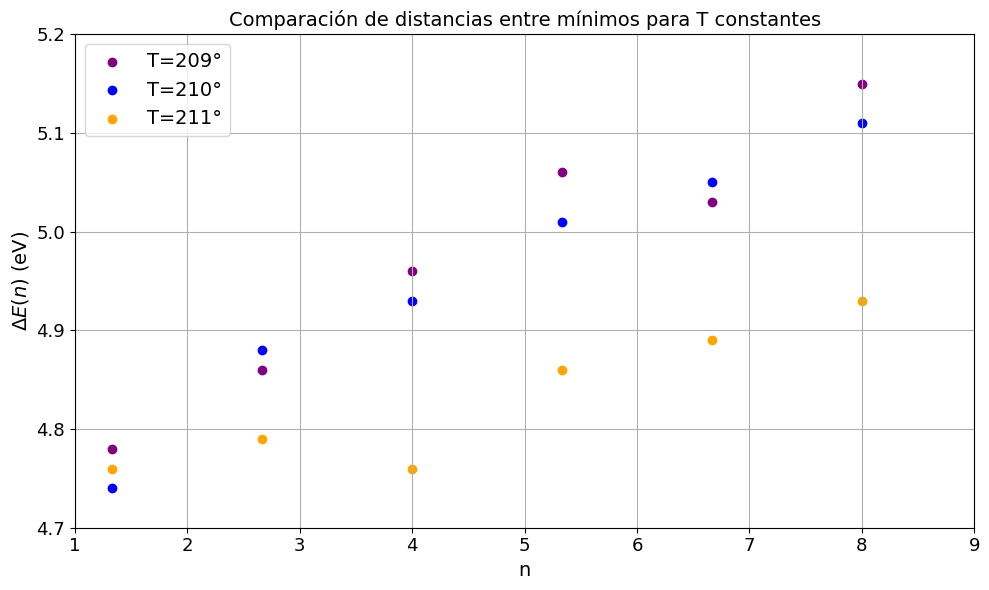

In [9]:
#Analisis estadistico
minimos_dfe1,voltajee1, corrientee1 = MinFH(Datae1['U1'],Datae1['IA'])
minimos_dfe2,voltajee2, corrientee2 = MinFH(Datae2['U1'],Datae2['IA'])
minimos_dfe3,voltajee3, corrientee3 = MinFH(Datae3['U1'],Datae3['IA'])

def difMinimos(min):
    diferences = []
    for i in range(0,len(min)-1):
        dif = min[i+1]-min[i]
        diferences.append(dif)
    return diferences

mine1 = difMinimos(minimos_dfe1['Voltaje U1'])[11:18]
mine2 = difMinimos(minimos_dfe2['Voltaje U1'])[13:20]
mine3 = difMinimos(minimos_dfe3['Voltaje U1'])[24:]

m_ = np.linspace(0,8,7)

fig1, ax1 = plt.subplots(1,1, figsize = (10, 6))

ax1.set_title('Comparación de distancias entre mínimos para T constantes',fontsize=14)

ax1.scatter(m_,mine1,label='T=209°',color='purple')
ax1.scatter(m_,mine2,label='T=210°',color='blue')
ax1.scatter(m_,mine3,label='T=211°',color='orange')
ax1.set_ylabel(r"$\Delta E(n)$ (eV)",fontsize=14)
ax1.set_xlabel(r'n',fontsize=14)
ax1.grid()
ax1.set_xlim(1,9)
ax1.set_ylim(4.7,5.2)
ax1.legend(fontsize=14)
ax1.tick_params(axis='both',labelsize=13)
fig1.tight_layout()

# fig1.savefig('minimos.pdf')

**T variable U2, UH constantes** 

In [10]:
#Datos de los minimos, voltaje, corriente suavizada
minimos_df185,voltaje185, corriente185 = MinFH(DataT185['U1'],DataT185['IA'])
minimos_df195,voltaje195, corriente195 = MinFH(DataT195['U1'],DataT195['IA'])
minimos_df215,voltaje215, corriente215 = MinFH(DataT215['U1'],DataT215['IA'])
minimos_df225,voltaje225, corriente225 = MinFH(DataT225['U1'],DataT225['IA'])
minimos_df180,voltaje180, corriente180 = MinFH(DataT180['U1'],DataT180['IA'])

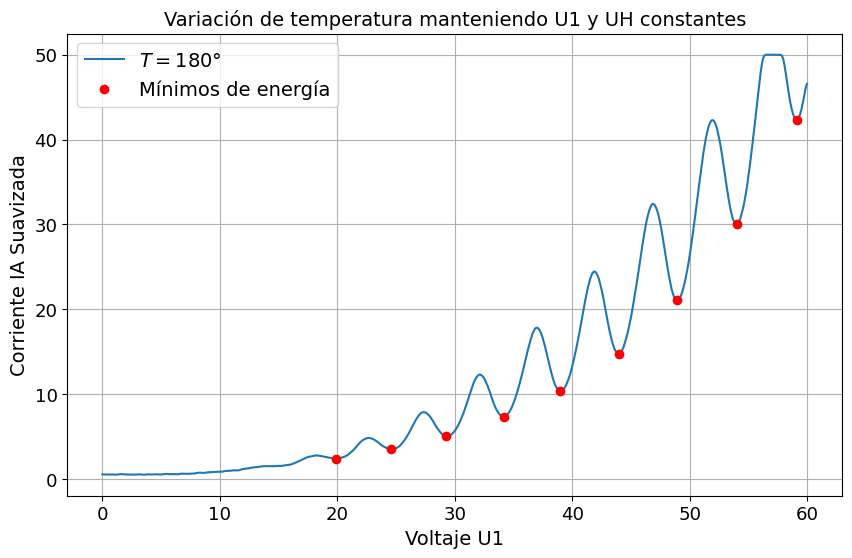

In [11]:
# Plotear la curva suavizada, y los mínimos locales
plt.figure(figsize=(10, 6))
plt.plot(voltaje225, corriente225, label=r"$T=180°$")

plt.plot(minimos_df225['Voltaje U1'][16:], minimos_df225['Corriente IA Suavizada'][16:], 'ro', label='Mínimos de energía')

plt.title('Variación de temperatura manteniendo U1 y UH constantes',fontsize=14)
plt.xlabel('Voltaje U1',fontsize=14)
plt.ylabel('Corriente IA Suavizada',fontsize=14)
plt.legend(fontsize=14)
plt.tick_params(axis='both',labelsize=13)
plt.grid()
plt.show()

In [12]:
def difMinimos(min):
    diferences = []
    for i in range(0,len(min)-1):
        dif = min[i+1]-min[i]
        diferences.append(dif)
    return diferences

min1 = difMinimos(minimos_df185['Voltaje U1'])[22:]
min2 = difMinimos(minimos_df195['Voltaje U1'])[18:]
min3 = difMinimos(minimos_df215['Voltaje U1'])[12:]
min4 = difMinimos(minimos_df225['Voltaje U1'])[16:]
min5 = difMinimos(minimos_df180['Voltaje U1'])[25:]

#Regresión lineal
param1 = np.polyfit(np.linspace(1,9,8),min1, 1)
_x1 = np.linspace(0,11,100)
ym1 = param1[0]*_x1 + param1[1]
m1 = param1[0]

param2 = np.polyfit(np.linspace(1,9,8),min2, 1)
_x2 = np.linspace(0,11,100)
ym2 = param2[0]*_x2 + param2[1]
m2 = param2[0]

param3 = np.polyfit(np.linspace(1,9,8),min3, 1)
_x3 = np.linspace(0,11,100)
ym3 = param3[0]*_x3 + param3[1]
m3 = param3[0]

param4 = np.polyfit(np.linspace(1,9,8),min4, 1)
_x4 = np.linspace(0,11,100)
ym4 = param4[0]*_x4 + param4[1]
m4 = param4[0]

param5 = np.polyfit(np.linspace(1,8,7),min5, 1)
_x5 = np.linspace(0,11,100)
ym5 = param5[0]*_x5 + param5[1]
m5 = param5[0]

print('Ea para T=180 será: {}'.format(ym5[5]))
print('Ea para T=185 será: {}'.format(ym1[5]))
print('Ea para T=195 será: {}'.format(ym2[5]))
print('Ea para T=215 será: {}'.format(ym3[5]))
print('Ea para T=225 será: {}'.format(ym4[5]))

print('l_exp para T=180 será: {}'.format((12/(2*ym5[5]))*m5))
print('l_exp para T=185 será: {}'.format((12/(2*ym1[5]))*m1))
print('l_exp para T=195 será: {}'.format((12/(2*ym2[5]))*m2))
print('l_exp para T=215 será: {}'.format((12/(2*ym3[5]))*m3))
print('l_exp para T=225 será: {}'.format((12/(2*ym4[5]))*m4))


#Parte de estadistica
res1 = Residuals(min1,ym1)
res2 = Residuals(min2,ym2)
res3 = Residuals(min3,ym3)
res4 = Residuals(min4,ym4)
res5 = Residuals(min5,ym5)

# #Obetner R^2
# R21 = GetR2(min1,ym1)
# R22 = GetR2(min2,ym2)
# R23 = GetR2(min3,ym3)
# R24 = GetR2(min4,ym4)
# R25 = GetR2(min5,ym5)

#Desviacion estandar
std1 = np.std(min1)
std2 = np.std(min2)
std3 = np.std(min3)
std4 = np.std(min4)
std5 = np.std(min5)
print('Inc para T=180 será: {}'.format(std5))
print('Inc para T=185 será: {}'.format(std1))
print('Inc para T=195 será: {}'.format(std2))
print('Inc para T=215 será: {}'.format(std3))
print('Inc para T=225 será: {}'.format(std4))
m3

Ea para T=180 será: 4.605527210884354
Ea para T=185 será: 4.736249999999999
Ea para T=195 será: 4.59462962962963
Ea para T=215 será: 4.633842592592591
Ea para T=225 será: 4.644444444444443
l_exp para T=180 será: 0.07697051383837056
l_exp para T=185 será: 0.02494061757719719
l_exp para T=195 será: 0.08678610293821301
l_exp para T=215 será: 0.0640666993036341
l_exp para T=225 será: 0.07428229665071766
Inc para T=180 será: 0.1522618582225628
Inc para T=185 será: 0.11433913372069852
Inc para T=195 será: 0.19000000000000028
Inc para T=215 será: 0.13341078479643284
Inc para T=225 será: 0.15337861650177914


0.049479166666666956

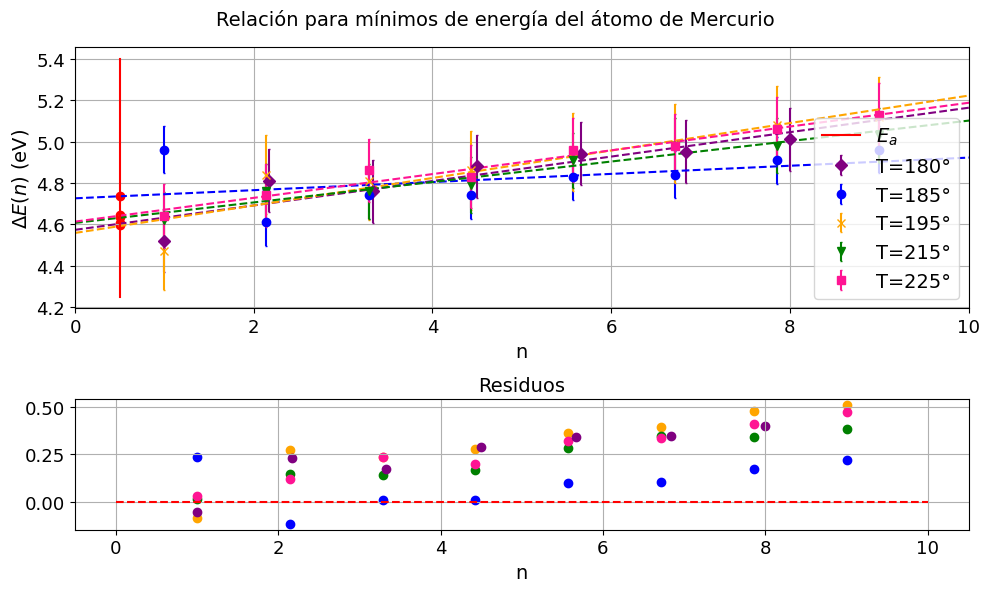

El valor del primer mimimo de energía para T= 180 es: 4.52
El valor del primer mimimo de energía para T= 185 es: 4.959999999999997
El valor del primer mimimo de energía para T= 195 es: 4.469999999999999
El valor del primer mimimo de energía para T= 215 es: 4.619999999999997
El valor del primer mimimo de energía para T= 225 es: 4.639999999999997


In [13]:
fig, axis = plt.subplots(2,1, figsize = (10, 6), gridspec_kw = {"height_ratios":[2, 1]})
ax1 = axis[0]
ax2 = axis[1]

fig.suptitle(r'Relación para mínimos de energía del átomo de Mercurio',fontsize=14)

ax1.errorbar(np.linspace(1,8,7),min5,label='T=180°',fmt='D',capsize=0.5,yerr=std5,color='purple')
ax1.errorbar(np.linspace(1,9,8),min1,label='T=185°',fmt='o',capsize=0.5,yerr=std1,color='blue')
ax1.errorbar(np.linspace(1,9,8),min2,label='T=195°',fmt='x',capsize=0.5,yerr=std2,color='orange')
ax1.errorbar(np.linspace(1,9,8),min3,label='T=215°',fmt='v',capsize=0.5,yerr=std3,color='green')
ax1.errorbar(np.linspace(1,9,8),min4,label='T=225°',fmt='s',capsize=0.5,yerr=std4,color='deeppink')

ax1.plot(_x5,ym5,'--',color='purple')
ax1.plot(_x1,ym1,'--',color='blue')
ax1.plot(_x2,ym2,'--',color='orange')
ax1.plot(_x3,ym3,'--',color='green')
ax1.plot(_x4,ym4,'--',color='deeppink')

ax1.scatter(0.5,ym5[5],color='red')
ax1.scatter(0.5,ym1[5],color='red')
ax1.scatter(0.5,ym2[5],color='red')
ax1.scatter(0.5,ym3[5],color='red')
ax1.scatter(0.5,ym4[5],color='red')

xa = [0.5,0.5,0.5,0.5,0.5,0.5,0.5]
ax1.plot(xa,np.linspace(4.25,5.4,len(xa)),color='red',label=r'$E_a$')


ax1.set_xlabel('n',fontsize=14)
ax1.set_ylabel(r'$\Delta E(n)$ (eV)',fontsize=14)
ax1.set_xlim(0,10)
# ax1.text(0.0020, 12.5, 'y={}x + {}'.format(round(parama1[0],2),round(parama1[1],2)),color='g')
# ax1.text(0.0020, 13, 'R^2 = {}'.format(round(R2a1,2)),color='g')
ax1.grid()
ax1.legend(fontsize=14)
ax1.tick_params(axis='both',labelsize=13)

ax2.scatter(np.linspace(1,9,8),res1,color='blue')
ax2.scatter(np.linspace(1,9,8),res2,color='orange')
ax2.scatter(np.linspace(1,9,8),res3,color='green')
ax2.scatter(np.linspace(1,9,8),res4,color='deeppink')
ax2.scatter(np.linspace(1,8,7),res5,color='purple')
ax2.plot(np.linspace(0,10,20),np.zeros_like(np.linspace(0,12,20)),'--',color='r')
ax2.grid()
ax2.tick_params(axis='both',labelsize=13)
ax2.set_title('Residuos',fontsize=14)
ax2.set_xlabel('n',fontsize=14)
fig.tight_layout()
plt.show()
# fig.savefig('minimos.pdf')

print('El valor del primer mimimo de energía para T= 180 es: {}'.format(difMinimos(minimos_df180['Voltaje U1'])[25]))
print('El valor del primer mimimo de energía para T= 185 es: {}'.format(difMinimos(minimos_df185['Voltaje U1'])[22]))
print('El valor del primer mimimo de energía para T= 195 es: {}'.format(difMinimos(minimos_df195['Voltaje U1'])[18]))
print('El valor del primer mimimo de energía para T= 215 es: {}'.format(difMinimos(minimos_df215['Voltaje U1'])[12]))
print('El valor del primer mimimo de energía para T= 225 es: {}'.format(difMinimos(minimos_df225['Voltaje U1'])[16]))


**T, UH constante U2 variable**

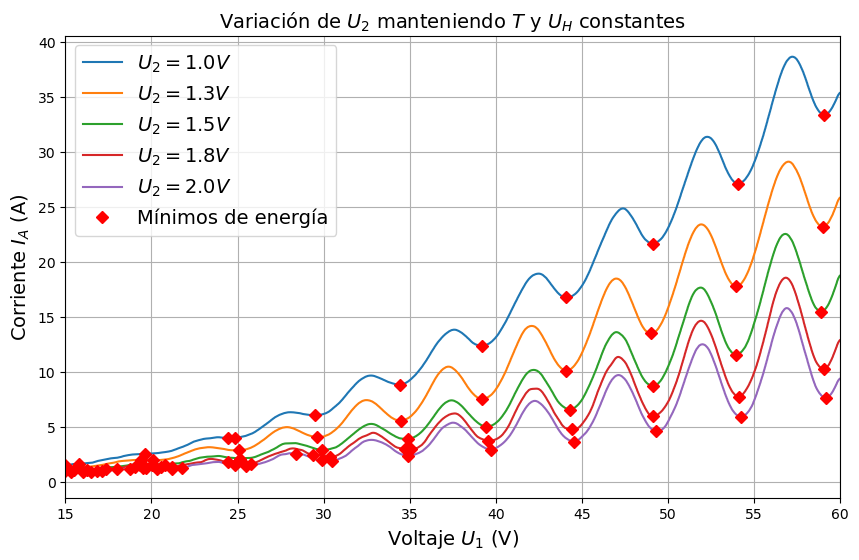

17.68

In [28]:
#Datos de los minimos, voltaje, corriente suavizada
minimos_dfu13,voltajeu13, corrienteu13 = MinFH(DataU2_13['U1'],DataU2_13['IA'])
minimos_dfu15,voltajeu15, corrienteu15 = MinFH(DataU2_15['U1'],DataU2_15['IA'])
minimos_dfu18,voltajeu18, corrienteu18 = MinFH(DataU2_18['U1'],DataU2_18['IA'])
minimos_dfu2,voltajeu2, corrienteu2 = MinFH(DataU2_2['U1'],DataU2_2['IA'])
minimos_dfu1,voltajeu1, corrienteu1 = MinFH(DataU2_1['U1'],DataU2_1['IA'])

#Graficas
fig2, ax2 = plt.subplots(1,1, figsize = (10, 6))

ax2.plot(voltajeu1, corrienteu1, label=r"$U_2=1.0 V$")
ax2.plot(voltajeu13, corrienteu13, label=r"$U_2=1.3 V$")
ax2.plot(voltajeu15, corrienteu15, label=r"$U_2=1.5 V$")
ax2.plot(voltajeu18, corrienteu18, label=r"$U_2=1.8 V$")
ax2.plot(voltajeu2, corrienteu2, label=r"$U_2=2.0 V$")

ax2.plot(minimos_dfu13['Voltaje U1'], minimos_dfu13['Corriente IA Suavizada'], 'rD', label='Mínimos de energía')
ax2.plot(minimos_dfu15['Voltaje U1'], minimos_dfu15['Corriente IA Suavizada'], 'rD')
ax2.plot(minimos_dfu18['Voltaje U1'], minimos_dfu18['Corriente IA Suavizada'], 'rD')
ax2.plot(minimos_dfu2['Voltaje U1'], minimos_dfu2['Corriente IA Suavizada'], 'rD')
ax2.plot(minimos_dfu1['Voltaje U1'], minimos_dfu1['Corriente IA Suavizada'], 'rD')

ax2.set_title(r'Variación de $U_2$ manteniendo $T$ y $U_H$ constantes',fontsize=14)
ax2.set_xlabel(r'Voltaje $U_1$ (V)',fontsize=14)
ax2.set_ylabel(r'Corriente $I_A$ (A)',fontsize=14)
ax2.set_xlim(15,60)
ax2.legend(fontsize=14)
ax2.grid()
plt.show()
# fig2.savefig('U2variable.pdf')

19.68-2.0

**T,U2 constantes y UH variable**

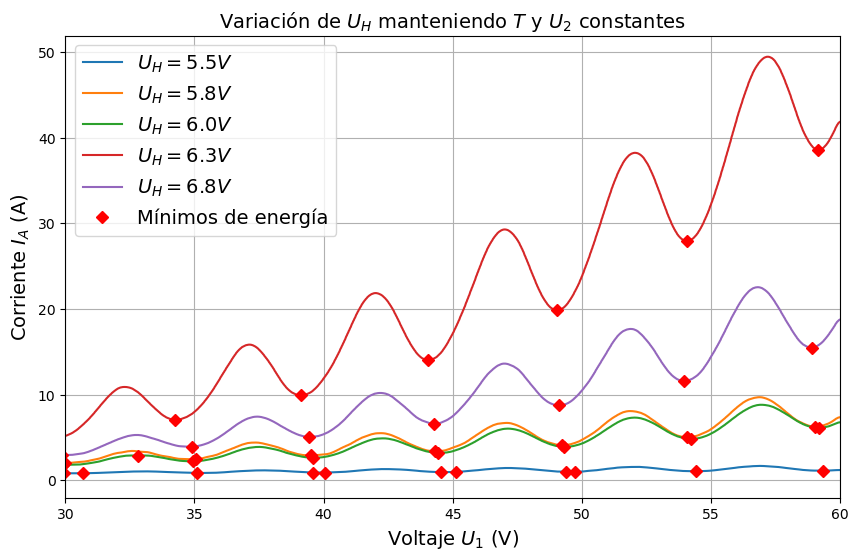

In [15]:
#Datos de los minimos, voltaje, corriente suavizada
minimos_dfu55,voltajeu55, corrienteu55 = MinFH(DataUh_55['U1'],DataUh_55['IA'])
minimos_dfu58,voltajeu58, corrienteu58 = MinFH(DataUh_58['U1'],DataUh_58['IA'])
minimos_dfu6,voltajeu6, corrienteu6 = MinFH(DataUh_6['U1'],DataUh_6['IA'])
minimos_dfu63,voltajeu63, corrienteu63 = MinFH(DataUh_63['U1'],DataUh_63['IA'])
minimos_dfu68,voltajeu68, corrienteu68 = MinFH(DataUh_68['U1'],DataUh_68['IA'])

#Graficas
fig3, ax3 = plt.subplots(1,1, figsize = (10, 6))

ax3.plot(voltajeu55, corrienteu55, label=r"$U_H=5.5 V$")
ax3.plot(voltajeu58, corrienteu58, label=r"$U_H=5.8 V$")
ax3.plot(voltajeu6, corrienteu6, label=r"$U_H=6.0 V$")
ax3.plot(voltajeu63, corrienteu63, label=r"$U_H=6.3 V$")
ax3.plot(voltajeu68, corrienteu68, label=r"$U_H=6.8 V$")

ax3.plot(minimos_dfu55['Voltaje U1'], minimos_dfu55['Corriente IA Suavizada'], 'rD', label='Mínimos de energía')
ax3.plot(minimos_dfu58['Voltaje U1'], minimos_dfu58['Corriente IA Suavizada'], 'rD')
ax3.plot(minimos_dfu6['Voltaje U1'], minimos_dfu6['Corriente IA Suavizada'], 'rD')
ax3.plot(minimos_dfu63['Voltaje U1'], minimos_dfu63['Corriente IA Suavizada'], 'rD')
ax3.plot(minimos_dfu68['Voltaje U1'], minimos_dfu68['Corriente IA Suavizada'], 'rD')

ax3.set_title(r'Variación de $U_H$ manteniendo $T$ y $U_2$ constantes',fontsize=14)
ax3.set_xlabel(r'Voltaje $U_1$ (V)',fontsize=14)
ax3.set_ylabel(r'Corriente $I_A$ (A)',fontsize=14)
ax3.set_xlim(30,60)
ax3.legend(fontsize=14)
ax3.grid()
plt.show()
# fig3.savefig('Uh variable.pdf')